In [13]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
data = pd.read_csv("Tweets.csv")

In [3]:
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
reviews = data[['text','airline_sentiment']]
print(reviews.shape)
reviews.head(10)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
7,@VirginAmerica Really missed a prime opportuni...,neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive


In [7]:
reviews = reviews[reviews['airline_sentiment'] != 'neutral']
print(reviews.shape)
reviews.head(10)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive
11,@VirginAmerica I &lt;3 pretty graphics. so muc...,positive
12,@VirginAmerica This is such a great deal! Alre...,positive
13,@VirginAmerica @virginmedia I'm flying your #f...,positive


In [8]:
reviews['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [9]:
sentiment_labels = reviews.airline_sentiment.factorize()
sentiment_labels

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [10]:
tweet = reviews.text.values

In [15]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)

In [17]:
encoded_text = tokenizer.texts_to_sequences(tweet)

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
padded_seq = pad_sequences(encoded_text,maxlen=200)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [42]:
embedding_vec_len = 32
model = Sequential()
model.add(Embedding(5000,embedding_vec_len,input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [43]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 32)           160000    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 176,651
Trainable params: 176,651
Non-trainable params: 0
_________________________________________________________________
None


In [44]:
history = model.fit(padded_seq,sentiment_labels[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 35s 109ms/step - loss: 0.3977 - accuracy: 0.8348 - val_loss: 0.2114 - val_accuracy: 0.9142
Epoch 2/5
289/289 [==============================] - 36s 123ms/step - loss: 0.2155 - accuracy: 0.9174 - val_loss: 0.1615 - val_accuracy: 0.9433
Epoch 3/5
289/289 [==============================] - 34s 118ms/step - loss: 0.1691 - accuracy: 0.9379 - val_loss: 0.1635 - val_accuracy: 0.9407
Epoch 4/5
289/289 [==============================] - 34s 119ms/step - loss: 0.1359 - accuracy: 0.9521 - val_loss: 0.1729 - val_accuracy: 0.9441
Epoch 5/5
289/289 [==============================] - 34s 118ms/step - loss: 0.1123 - accuracy: 0.9579 - val_loss: 0.1678 - val_accuracy: 0.9407


Matplotlib is building the font cache; this may take a moment.


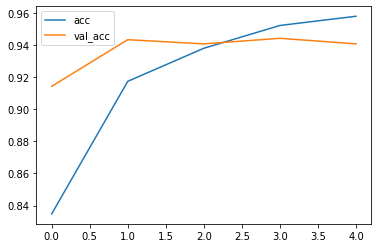

<Figure size 432x288 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

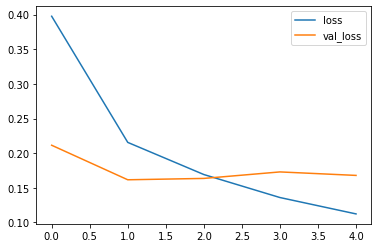

<Figure size 432x288 with 0 Axes>

In [46]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig("Loss plt.jpg")

In [49]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_labels[1][prediction])

In [52]:
test_sentence1 = "No enjoyment in this travel"
predict_sentiment(test_sentence1)
test_sentence2 = "Good flight"
predict_sentiment(test_sentence2)

Predicted label:  negative
Predicted label:  positive
